# 1. Data to Insights


### 1.1 Business Understanding

The business problem under study here is why the best employees of this company are 
leaving pre-maturely. The company also wants us to predict which employees will be 
leaving next. 

### 1.2 Analytic Solution

We have two main goals:

* We want to understand why the good employees leave
* Predict who will leave next

We propose working with the HR department to gather significant data that can 
probably explain the cause and effect relationship under question.

### 1.3 Feasability Study

Managers in the HR department have not kept an organised report on why employees 
have left but from the data we can determine this through sound data science 
techniques. 

From the data given we have the following information: For our 15000 employees: 
satisfaction level, latest evaluation (yearly), number of project worked on, 
average monthly hours, time spend in the company (in years), 
work accident (within the past 2 years), promotion within the past 5 years, 
department and salary.

### 1.4 Analytical Base Table

This is the data provided by the HR department:

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Data Exploration

Here our aim is to asses the quality of our data, rectify and clean the data where
it might suffer and run visualizations to help us understand our data graphically.

### 2.1 Data Quality Report

In [2]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This table describe the characteristics of each features of our analytical base table. 
We can see different statistical measures of central tendency and variation. For 
example we can see that our attrition rate is equal to 24%, the satisfaction level 
is around 62% and the performance average is around 71%. We see that on average 
people work on 3 to 4 projects a year and about 200 hours per months.

## 2.2 Data Cleaning

The data had a couple of incorrectly named column names.

In [3]:
df = df.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours'
})

The data did not have any NULL values

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

The categorical variables were 'int64' type

In [5]:
# Convert required columns to categorical
df['salary'] = df['salary'].astype('category')
df['left'] = df['left'].astype('category')
df['department'] = df['sales'].astype('category')
df = df.drop('sales', 1)
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')
df['work_accident'] = df['work_accident'].astype('category')

There were duplicate rows of data

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


## 2.3. Data Visualization

This section deals with the insights that we have obtained graphically. Our main aim here is to obtain information regarding the employees who left and the employees who stayed with the firm.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

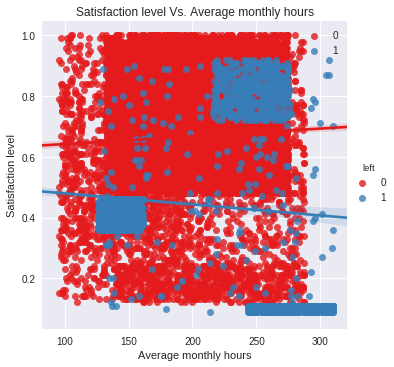

In [9]:
sns.lmplot(x='average_monthly_hours', y='satisfaction_level',data=df, hue='left', palette='Set1')
plt.xlabel("Average monthly hours")
plt.ylabel("Satisfaction level")
plt.title("Satisfaction level Vs. Average monthly hours")
plt.legend()

The plot above is a scatterplot between Satisfaction levels of the employees and the average monthly hours worked by the employee. The employees who have left the
firm are in blue while the employees who have stayed in the firm are in red. 

We can observe that the bulk of the employees who have left the firm have worked between **225 to 275 hours** and have satisfaction levels between **0.7 to 0.9.**

The next chunk of employees that have left the firm have worked between **130 to 160 hours** and have **lower satisfaction levels of 0.3 to 0.5**.

The final set of employees who have left the firm have worked between **245 to 320 hours** have the lowest satisfaction levels in the range of **0 to 0.15**.

This clearly shows us that employees who work more hours for the firm and have high satisfaction levels have indeed left the firm. 

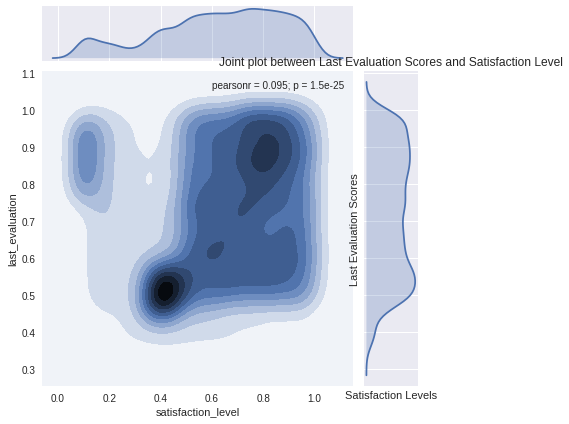

In [11]:
sns.jointplot(x="satisfaction_level", y="last_evaluation", data=df, kind='kde')
plt.xlabel("Satisfaction Levels")
plt.ylabel("Last Evaluation Scores")
plt.title("Joint plot between Last Evaluation Scores and Satisfaction Level")

The joint density plot above shows us a lot of employees in the firm have low satisfaction levels in the range of **0.35 to 0.45**. These employees also have lower scores in their last evaluation. This shows us that the people who are not satisfied do not perform well on their jobs in the firm.

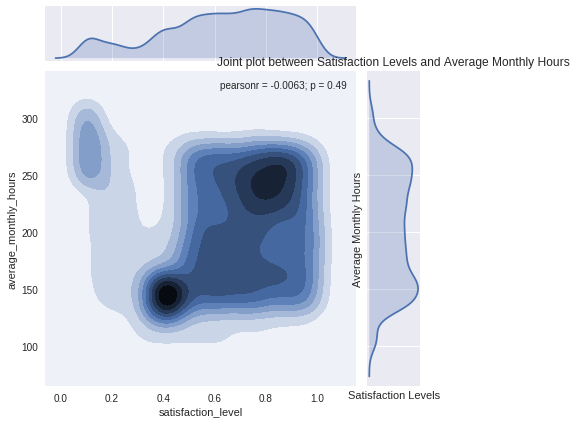

In [12]:
sns.jointplot(x="satisfaction_level",y="average_monthly_hours", data=df, kind='kde')
plt.xlabel("Satisfaction Levels")
plt.ylabel("Average Monthly Hours")
plt.title("Joint plot between Satisfaction Levels and Average Monthly Hours")

The joint density plot above shows us that the bulk of the employees either had low satisfaction levels **(0.35 to 0.45)** and correspondly low working hours (**125 to 160 hours**).

They also have high satisfaction levels **(0.7 to 0.9)** and correspondly high average working hours (220 to 260) hours. This shows us the employees in the company do not lead very balanced lives. They either work too much or too little and have really high or really low satisfaction levels. 

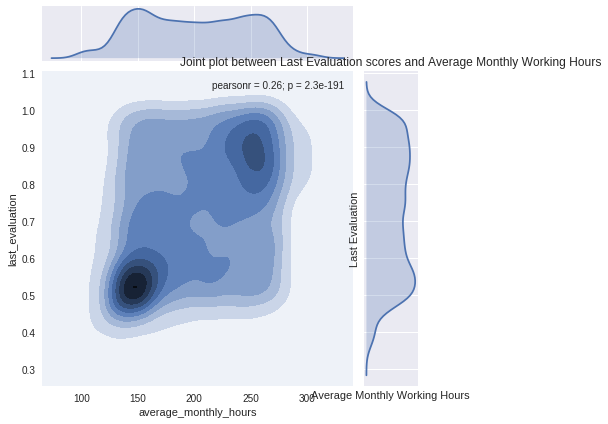

In [13]:
sns.jointplot(x="average_monthly_hours",y="last_evaluation", data=df, kind='kde')
plt.xlabel("Average Monthly Working Hours")
plt.ylabel("Last Evaluation")
plt.title("Joint plot between Last Evaluation scores and Average Monthly Working Hours")

From the plot above we can infer that most of the employees who between **130 to 150** hours a month have correspondingly low last evaluation scores between **0.45 to 0.55**. This may tell us the that the organisation values the time put in by the employee over the quality of work produced which might be why the good employees have left the firm. 

The plots shown below help us understand the distribution of continous variables in the 
dataset.

In [14]:
# defining the percentiles we want
percentiles = np.array([25, 50, 75])

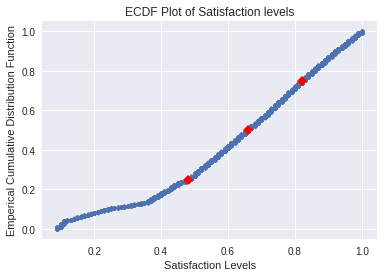

In [15]:
# Emperical Cumulative Distribution Function plot for Satisfaction levels

ptiles = np.percentile(df['satisfaction_level'], percentiles)
x = np.sort(df['satisfaction_level'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')

plt.xlabel("Satisfaction Levels")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Satisfaction levels")

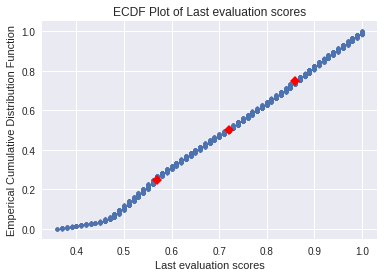

In [16]:
# ECDF plot for last evaluation scores
ptiles = np.percentile(df['last_evaluation'], percentiles)
x = np.sort(df['last_evaluation'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')

plt.xlabel("Last evaluation scores")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Last evaluation scores")

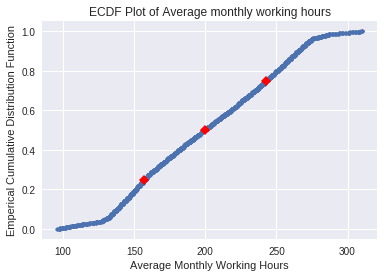

In [17]:
# ECDF plot for average monthly working hours
ptiles = np.percentile(df['average_monthly_hours'], percentiles)
x = np.sort(df['average_monthly_hours'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')

plt.xlabel("Average Monthly Working Hours")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Average monthly working hours")

From the ECDF plot for satisfaction levels we can understand that the mean satisfaction levels in the firm are slightly above average (0.67). We can also observe that the lower 25th percentile of satisfaction levels are not that low (0.45). Employees seem pretty satisfied in the firm. 

The last evaluation scores in the firm are also quite high and all above average for the 
25th, 50th and 75th percentiles.

The employees in the firm worked 200 hours every month on average with the ECDF plot 
following a normal distribution.

Next, lets take a look at how employees performed in the organisation based on their
salary levels using the violin plot.

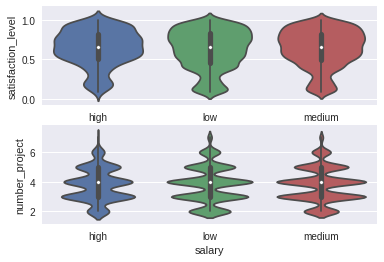

In [18]:
plt.subplot(2,1,1)
sns.violinplot(x='salary', y='satisfaction_level', data=df)

plt.subplot(2,1,2)
sns.violinplot(x='salary', y='number_project', data=df)

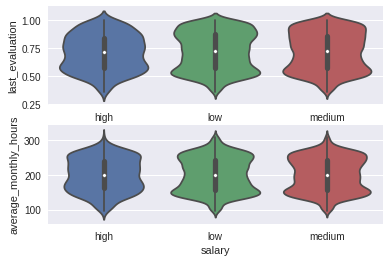

In [19]:
plt.subplot(2,1,1)
sns.violinplot(x='salary', y='last_evaluation', data=df)

plt.subplot(2,1,2)
sns.violinplot(x='salary', y='average_monthly_hours', data=df)

From the 4 plots above we can observe that the distributions for the satisfaction levels, number of projects, last evaluation scores and the average monthly working hours of the employees are more or less the same across all three levels of salaries - Low (0), Medium (1) and High(2).

Next we will take a look at some histograms that shows us the comparison between the employees who stayed and the emloyees who left the firm. 

* The first set of histograms shows us the factors that have little to NO influence on the employees who left and the employees who stayed because both the histograms under comparison are similar in distribution.
* The second set of histograms shows us the factors that have some to significant influence on the employees who left and the employees who stayed becuase the two histograms under comparison have different distributions.

In the histograms below:
    
* 0 stands for the employees who stayed with the firm.
* 1 stands for the employees who left the firm.

**Histograms where the factors have no influence on the employees who left or stayed**

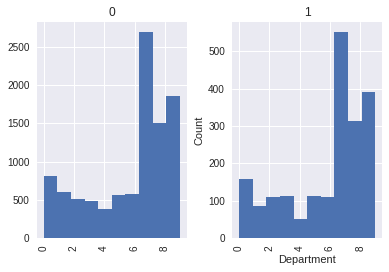

In [33]:
df['department'].cat.codes.hist(by=df['left'])
plt.xlabel("Department")
plt.ylabel("Count")

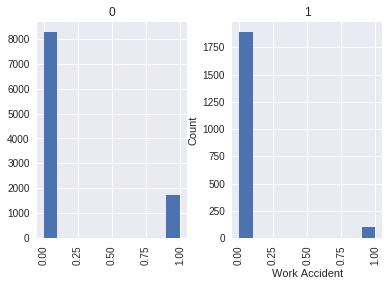

In [21]:
df['work_accident'].hist(by=df['left'])
plt.xlabel("Work Accident")
plt.ylabel("Count")

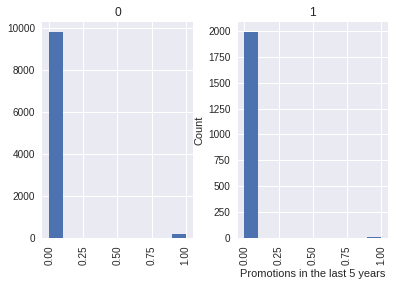

In [24]:
df['promotion_last_5years'].hist(by=df['left'])
plt.xlabel("Promotions in the last 5 years")
plt.ylabel("Count")

**Histograms where the factors have influence on the employees who left or stayed**

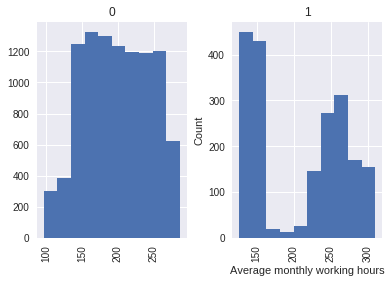

In [25]:
df['average_monthly_hours'].hist(by=df['left'])
plt.xlabel("Average monthly working hours")
plt.ylabel("Count")

In the histogram above, for the employees who left the firm we can observe: 

* The maximum number of employees that left the firm were those who had really low working hours (Lesser than 160) and those who had higher working hours (Between 230 to 270).
* Employees stayed with the firm when the working hours were between 160 to 220 every month. 

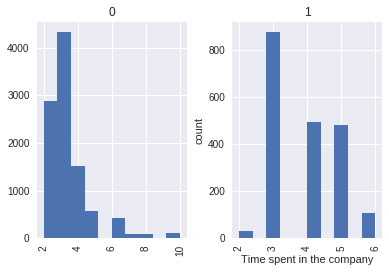

In [26]:
df['time_spend_company'].hist(by=df['left'])
plt.xlabel("Time spent in the company")
plt.ylabel("count")

In the histogram above, for the employees who left the firm we can observe: 
    
* The maximum number of employees left the firm after working for 3 years. 
* The number of employees leaving the firm is minimum at (0 to 2) years and 6 years but is consistently high between 4 to 5 years with the firm.

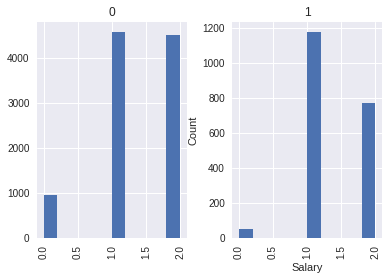

In [34]:
df['salary'].cat.codes.hist(by=df['left'])
plt.xlabel("Salary")
plt.ylabel("Count")

In the histogram above, for the employees who left the firm we can observe: 

* The maximum number of employees who left the firm were those who got a mid level salary
* The least number of employees who left the firm were those who got a low level salary

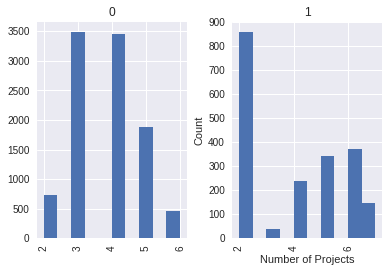

In [35]:
df['number_project'].hist(by=df['left'])
plt.xlabel("Number of Projects")
plt.ylabel("Count")

In the histogram above for the employees who left the firm we can observe:

* The maximum number of employees who left the firm only did 2 projects for the firm.
* The least number of employees who left the firm did 3 projects for the firm.

Next lets take a look at how the different factors like monthly working hours, satisfaction levels and last evaluation scores vary by the different departments:

In [57]:
raw_df = pd.read_csv("HR_comma_sep.csv")
raw_df = raw_df.rename(columns={
    'sales': 'department',
    'average_montly_hours': 'average_monthly_hours'
})

raw_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

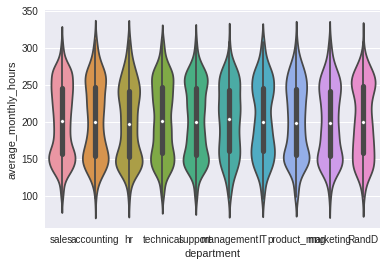

In [58]:
sns.violinplot(x='department', y='average_monthly_hours', data=raw_df)

In the violin plot above we can observe how the distribution of average monthly working hours is distributed equally throughout all the departments indicating that all departments worked almost the same number of hours every month.

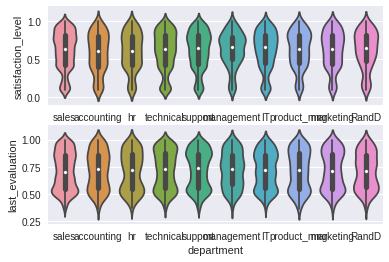

In [59]:
plt.subplot(2,1,1)
sns.violinplot(x='department', y='satisfaction_level', data=raw_df)

plt.subplot(2,1,2)
sns.violinplot(x='department', y='last_evaluation', data=raw_df)

We can also notice how the Satisfaction levels and the last evaluation scores are distributed equally across all departments in the firm. 

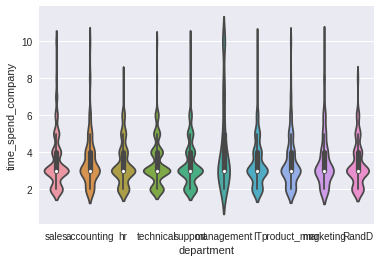

In [60]:
sns.violinplot(x='department', y='time_spend_company', data=raw_df)

What is different is the time spend in the firm?

* Notice how the employees in the HR and R and D departments spend lesser time in the firm compared to the rest of firm.
* We can also notice how the management department spends the longest time in the firm.
* This might indicate that the management is to blame for employees leaving the firm.

Next we will visualize a series of boxplots to see the difference the median values of factors between the employees who left the firm and the employees who stayed with the firm.

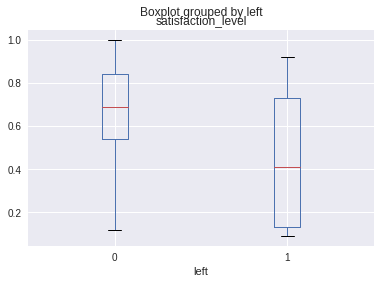

In [61]:
raw_df.boxplot(column='satisfaction_level', by='left')

In the boxplot above we can notice:
    
* The median value of the satisfaction levels of the employees who left are lower than the employees who stayed
* We can also observe that the satisfaction levels of the meployees who left are indeed lower than the employees who stayed.

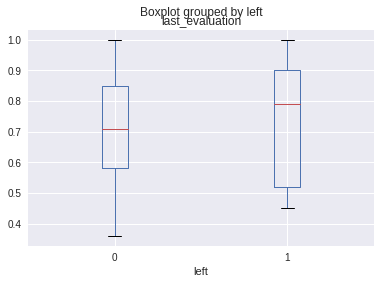

In [62]:
raw_df.boxplot(column='last_evaluation', by='left')

In the boxplot we can observe:
    
* The median last evaluation scores of the employees who left the firm were indeed greater than the employees who stayed suggesting that the good employees did indeed leave the firm.

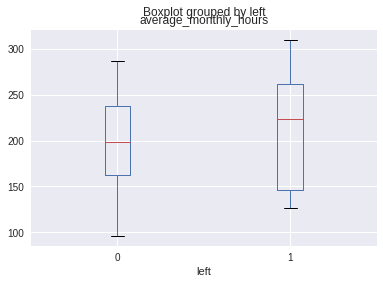

In [63]:
raw_df.boxplot(column='average_monthly_hours', by='left')

In the boxplot above we can notice:

* That the median number of hours worked by the employees who left the firm were higher than the median hours worked by the employees who stayed with the firm suggesting that they could be overworked. 

### 2.3.1 Conclusion

From the visualizations carried above we have come to understand the following about the employees who left the firm:
    
* The employees who left the firm did indeed have a better performance than the employees who stayed with the firm.
* The employees who left the firm had lower satisfaction levels
* The employees who left the firm were made to work longer hours monthly.
* The management department stayed the longest number of years with the firm suggesting that the employees in the other departments could have had issues with the management.
* Employees who were given lesser projects were more likely to leave the firm.
* Employees having a mid level salary were more likely to leave the firm.
* Employees who worked really less number of hours or worked a high number of hours were more likely to leave the firm.
* Employee were more likely to leave the firm after working for 3 years.

# 3 Statistical Modelling

The aim of statistical modelling is to verify the authencitiy of the quality of the data that we have gotten from the HR department. 

## 3.1 Modelling the Satisfaction levels

In [66]:
# Function to compute the ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

**Checking the distribution of Satisfaction levels**

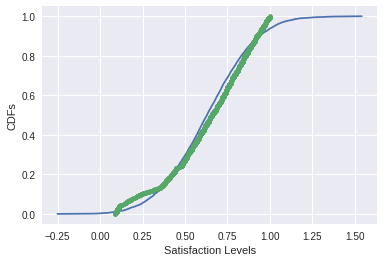

In [67]:
# Comparing Theoretical and Actual Distributons of Satisfaction levels
mean = np.mean(df["satisfaction_level"])
std = np.std(df["satisfaction_level"])
samples = np.random.normal(mean, std, size = 10000)
x, y = ecdf(df["satisfaction_level"])
x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y,marker = '.', linestyle = 'none')

plt.xlabel("Satisfaction Levels")
plt.ylabel("CDFs")

In the plot above we have compared the theoretical distiribution (blue) of the satisdaction levels with the actual distribution (green) obtained from the 
data to check if it follows a normal distribution.

From the plot above we can say:

* The satisfaction levels are not EXACTLY normally distributed but is close to being normally distributed.

**Comparing Theoretical and Actual distribution for satisfaction levels (Exponential)**

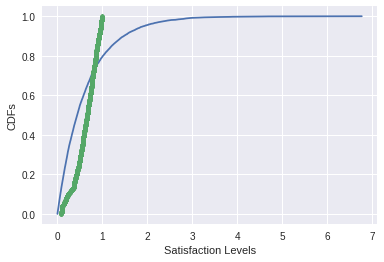

In [68]:
mean = np.mean(df["satisfaction_level"])
samples = np.random.exponential(mean, size = 10000)
x, y = ecdf(df["satisfaction_level"])
x_theor, y_theor = ecdf(samples)\

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y,marker = '.', linestyle = 'none')

plt.xlabel("Satisfaction Levels")
plt.ylabel("CDFs")

In the plot above we have compared the theoretical distiribution (blue) of the satisfaction levels with the actual distribution (green) obtained from the 
data to check if it follows a exponential distribution.

From the plot above we can say:

* Satisfaction levels are not exponentially distributed at all. 

We are now going to bootstrap in order to find the 95% confidence levels of various parameters like the mean, standard deviation, median and variance of the satisfaction level.

In [71]:
def bootstrap_replicates(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [72]:
bs_replicates_mean = np.empty(100000)
bs_replicates_var = np.empty(100000)
bs_replicates_std = np.empty(100000)
bs_replicates_median = np.empty(100000)

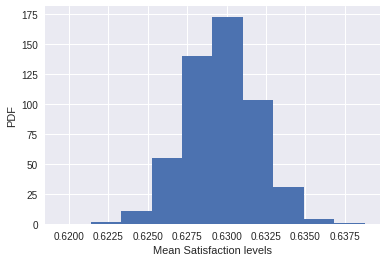

In [73]:
for i in range(100000):
    bs_replicates_mean[i] = bootstrap_replicates(
        df["satisfaction_level"], np.mean)
    bs_replicates_median[i] = bootstrap_replicates(
        df["satisfaction_level"], np.median)

plt.hist(bs_replicates_mean, normed=True)
plt.xlabel("Mean Satisfaction levels")
plt.ylabel("PDF")

In [74]:
conf_int_mean = np.percentile(bs_replicates_mean, [2.5, 97.5])
print("Mean:  {:.2f} and {:.2f}".format(
      conf_int_mean[0], conf_int_mean[1]))

Mean:  0.63 and 0.63


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The mean of the satisfaction levels in the firm was 0.63 with a 95% confidence interval. 
* The mean of the satisfaction levels in the firm from the dataset handed to us by the HR department was 0.63 and hence the boostrapped mean is exactly the same as the mean provided in the dataset and hence we can be sure that the mean satisfaction levels in the firm was 0.63.

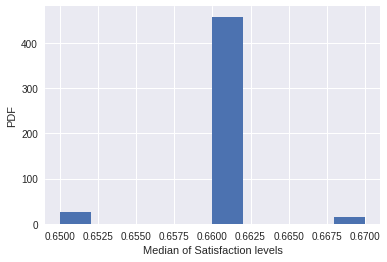

In [75]:
plt.hist(bs_replicates_median, normed=True)
plt.xlabel("Median of Satisfaction levels")
plt.ylabel("PDF")

In [76]:
conf_int_median = np.percentile(bs_replicates_median, [2.5, 97.5])
print("Median: {:.2f} and {:.2f}".format(
      conf_int_median[0], conf_int_median[1]))

Median: 0.65 and 0.67


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The median of the satisfaction levels in the firm was between 0.65 and 0.67 with a 95% confidence interval.
* THe median satisfaction levels in the firm from the dataset provided by the HR department was 0.66 and hence we can be sure that the median satisfaction levels in the firm would be between 0.65 and 0.67 even if the data collection were carried out a 100,000 times.

## 3.2 Modelling the Average monthly hours worked

**Checking out the distributions of average monthly hours**

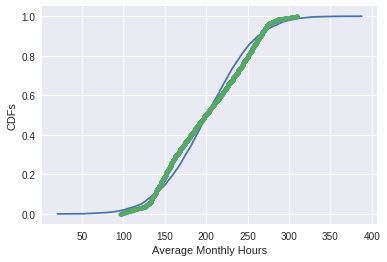

In [78]:
mean = np.mean(df["average_monthly_hours"])
std = np.std(df["average_monthly_hours"])

# Comparing theoretical (Normal) and actual distribution 
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df["average_monthly_hours"])
x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel("Average Monthly Hours")
plt.ylabel("CDFs")

In the plot above we have compared the theoretical distiribution (blue) of the average monthly hours with the actual distribution (green) obtained from the data to check if it follows a normal distribution.

From the plot above we can say:

* The satisfaction levels are not EXACTLY normally distributed but is close to being normally distributed.

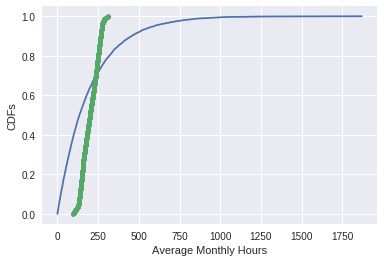

In [79]:
# Comparing theoretical (Exponential) and actual distribution 
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(df["average_monthly_hours"])
x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel("Average Monthly Hours")
plt.ylabel("CDFs")

In the plot above we have compared the theoretical distiribution (blue) of the average monthly hours with the actual distribution (green) obtained from the data to check if it follows a exponential distribution.

From the plot above we can say:

* Satisfaction levels are not exponentially distributed at all. 

We are now going to bootstrap in order to find the 95% confidence levels of various parameters like the mean, standard deviation, median and variance of the satisfaction level.

In [ ]:
def bootstrap_replicates(data, func): 
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates_mean = np.empty(100000)
bs_replicates_var = np.empty(100000)
bs_replicates_std = np.empty(100000)
bs_replicates_median = np.empty(100000)

for i in range(100000):
    bs_replicates_mean[i] = bootstrap_replicates(
        df["average_monthly_hours"], np.mean)
    bs_replicates_median[i] = bootstrap_replicates(
        df["average_monthly_hours"], np.median)

plt.hist(bs_replicates_mean, normed=True)
plt.xlabel("Mean Average Monthly Hours")
plt.ylabel("PDF")

In [ ]:
conf_int_mean = np.percentile(bs_replicates_mean, [2.5, 97.5])
print("Mean:  {:.2f} and {:.2f}".format(
      conf_int_mean[0], conf_int_mean[1]))

From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The mean of the average monthly hours in the firm was between 199.60 and 201.34 hours with a 95% confidence interval. 
* The mean of the average monthly hours in the firm from the dataset provided by the HR department was 200.47 and hence it is between 199.60 and 201.34. Hence we can be 95% sure that the mean of 200.47 as observed in the dataset is accurate even if the data collection were carried out a 100,000 times. 

In [ ]:
plt.hist(bs_replicates_median, normed=True)
plt.xlabel("Median of Average Monthly Hours")
plt.ylabel("PDF")

In [ ]:
conf_int_median = np.percentile(bs_replicates_median, [2.5, 97.5])
print("Median: {:.2f} and {:.2f}".format(
    conf_int_median[0], conf_int_median[1]))

From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The median of the average monthly hours in the firm was between 198 and 201 hours with a 95% confidence interval. 
* The median of the average monthly hours in the firm from the dataset provided by the HR department was 200 and hence it is between 198 and 201. Hence we can be 95% sure that the mean of 200 as observed in the dataset is accurate even if the data collection were carried out a 100,000 times. 

In [ ]:
# 3.3 Modelling the last evaluation scores

# checking out the distribution of the `last_evaluation` column

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


mean = np.mean(df["last_evaluation"])
std = np.std(df["last_evaluation"])


# Function to compute the ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [ ]:
# trying out a normal distribution
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df["last_evaluation"])
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("Last Evaluation")
plt.ylabel("CDFs")
plt.show()

In [ ]:
In the plot above we have compared the theoretical distiribution (blue) of the
last evaluation scores with the actual distribution (green) obtained from the 
data to check if it follows a normal distribution.

From the plot above we can say:

* The satisfaction levels are not EXACTLY normally distributed but is almost close 
to being normally distributed.

In [ ]:
# trying out an exponential distribution
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(df["last_evaluation"])
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("Last Evaluation")
plt.ylabel("CDFs")
plt.show()

In [ ]:
In the plot above we have compared the theoretical distiribution (blue) of the
Last evaluation scores with the actual distribution (green) obtained from the 
data to check if it follows a exponential distribution.

In [ ]:
From the plot above we can say:

* Last evaluation scores are not exponentially distributed at all. 

In [ ]:
#Bootstrapping parameters

def bootstrap_replicates(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


bs_replicates_mean = np.empty(100000)
bs_replicates_var = np.empty(100000)
bs_replicates_std = np.empty(100000)
bs_replicates_median = np.empty(100000)


for i in range(100000):
    bs_replicates_mean[i] = bootstrap_replicates(
        df["last_evaluation"], np.mean)
    bs_replicates_median[i] = bootstrap_replicates(
        df["last_evaluation"], np.median)

plt.hist(bs_replicates_mean, normed=True)
plt.xlabel("Mean Last Evaluation")
plt.ylabel("PDF")
plt.show()

conf_int_mean = np.percentile(bs_replicates_mean, [2.5, 97.5])
print("Mean:  {:.2f} and {:.2f}".format(
    conf_int_mean[0], conf_int_mean[1]))

In [ ]:
From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The mean of the last evaluation scores in the firm was between 0.71 and 0.72 
with a 95% confidence interval. 
* The mean of the last evaluation scores in the firm from the dataset provided by 
the HR department was 0.716 and hence it is between 0.71 and 0.72. Hence we 
can be 95% sure that the mean of 0.716 as observed in the dataset is accurate
even if the data collection were carried out a 100,000 times. 

In [ ]:
plt.hist(bs_replicates_median, normed=True)
plt.xlabel("Median of Last Evaluation")
plt.ylabel("PDF")
plt.show()

conf_int_median = np.percentile(bs_replicates_median, [2.5, 97.5])
print("Median: {:.2f} and {:.2f}".format(
    conf_int_median[0], conf_int_median[1]))

In [ ]:
From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The median of the last evaluation scores in the firm was between 0.71 and 0.73 
with a 95% confidence interval. 
* The median of the last evaluation scores in the firm from the dataset provided by 
the HR department was 0.719 and hence it is between 0.71 and 0.73. Hence we 
can be 95% sure that the median of 0.719 as observed in the dataset is accurate
even if the data collection were carried out a 100,000 times. 

In [8]:
# 3.4 Conclusion

From the statisical modelling carried out above we have achieved the following:
    
* We were able to confirm the type of distributions the contious variables in the 
dataset had.
* We were able to verify the mean and median values using the Bootstrapping 
technique with a 95% confidence interval. 

# 4. Machine Learning

Three algorithms are compared here:
* K Nearest Neighbors Classification
* Logistic Regression
* Decision Trees

Each model is trained and tested with the same train-test split of the original dataframe.

The ROC Curve is plotted and the AUC is calculated for each algorithm.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# The categorical columns are one-hot encoded

X = pd.get_dummies(df.drop('left', axis=1)).values
y = df['left'].cat.codes.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## 4.1 Parameter Fine-Tuning

Before running the machine learning models, the parameters for each of the models have to be chosen.

### 4.1.1 KNeighborsClassifier

The parameter `n_neighhors` is to be determined

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)

In [16]:
param_grid = {'n_neighbors': np.arange(3, 15)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 8}

## 4.2 Building the machine learning models

In [17]:
knn = KNeighborsClassifier(n_neighbors=8)
logreg = LogisticRegression()
tree = DecisionTreeClassifier()

classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree
}

regression_models = {
    'LogisticRegression': logreg
}

### 4.2.1 Model scores

In [18]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))
    
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))

KNeighboursClassfier	0.9502273875694796
DecisionTreeClassifier	0.9663971702880243
LogisticRegression	0.8302172814552804


### 4.2.2 ROC Curve and AUC

KNeighboursClassfier	0.9224318408470947
DecisionTreeClassifier	0.9454195142697913


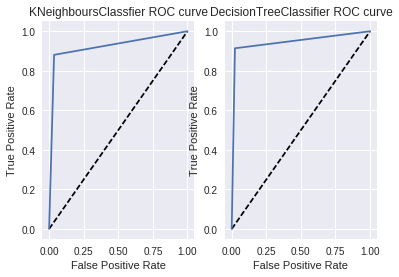

In [19]:
subplot_count = 1

for name, model in classification_models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, tresholds = roc_curve(y_test, y_pred)
    
    plt.subplot(1, len(classification_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{}\t{}'.format(name, roc_auc_score(y_test, y_pred)))

LogisticRegression AUC:	0.8316869482005104


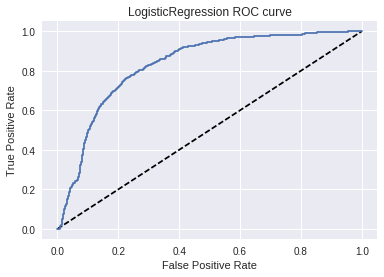

In [20]:
subplot_count = 1

for name, model in regression_models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    
    plt.subplot(1, len(regression_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{} AUC:\t{}'.format(name, roc_auc_score(y_test, y_pred_prob)))

### 4.2.3 Scaling

The accuracy scores are calculated for a standardized version of the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [22]:
for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

    
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

KNeighboursClassfier	0.9466902475997979
DecisionTreeClassifier	0.966144517433047
LogisticRegression	0.8314805457301667


### 4.2.4 Feature Selection

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
pd.DataFrame(model.feature_importances_,
             index=pd.get_dummies(df.drop('left', axis=1)).columns,
             columns=['Importance'])

,Importance
satisfaction_level,0.268485
last_evaluation,0.134815
number_project,0.211228
average_monthly_hours,0.141572
time_spend_company,0.174204
work_accident_0,0.009136
work_accident_1,0.006833
promotion_last_5years_0,0.000986
promotion_last_5years_1,0.000897
salary_high,0.006088


In [25]:
columns_to_keep = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'time_spend_company',
    'average_monthly_hours'
]

X = df[columns_to_keep].values
y = df['left'].cat.codes.values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))
    
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))

KNeighboursClassfier	0.9552804446690247
DecisionTreeClassifier	0.9681657402728651
LogisticRegression	0.8279434057604851


## 4.3 Observations

**Simple logistic regression does not perform very well**

The data points are not linearly separable

*Logistic Regression however is fast to run and gives an idea initially about how hard the problem is*

**Non-linear classification algorithms outperform linear regression**

A non-linear function is required to classify data points

*Since simple off-the-shelf non-linear classifiers were able to perform a fair job, it is decided that algorithms capable of classifying highly non-linear data such as neural networks or SVMs coupled with custom kernels will only overfit the data*

**Feature selection improves the performance of K-Neighbors but not decision trees**

Decision trees incorporates the best features inherently (since the most contributing features are involved in the decision nodes in most cases)


## 4.4 Conclusion

The dataset is non-linearly classifiable to a good degree of generalization. Hence simple non-linear classification algorithms perform well.